### Séries temporais
___

#### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Importando dados

In [5]:
data = pd.read_csv('./data/AirPassengers.csv')
data.shape

(144, 2)

In [6]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

#### Conversão os atributos que estão no formato string para o formato data

In [14]:
dataparse = lambda  dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('./data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dataparse)
data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [15]:
data.dtypes

#Passengers    int64
dtype: object

In [12]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

#### Criação de uma série temporal

In [17]:
ts = data['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

#### Visualização de registro específico

In [18]:
ts[1]

118

#### Visualização por ano e mês

In [20]:
ts['1949-2']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

#### Visualização de data específica

In [19]:
ts[datetime(1949, 2, 1)]

118

#### Visualização de intervalos

In [21]:
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

#### Visualização de intervalos sem preencher a data de início

In [23]:
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

#### Visualização por ano

In [24]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

#### Valor máximo

In [27]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

#### Valor mínimo

In [28]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

#### Visualização da série temporal completa

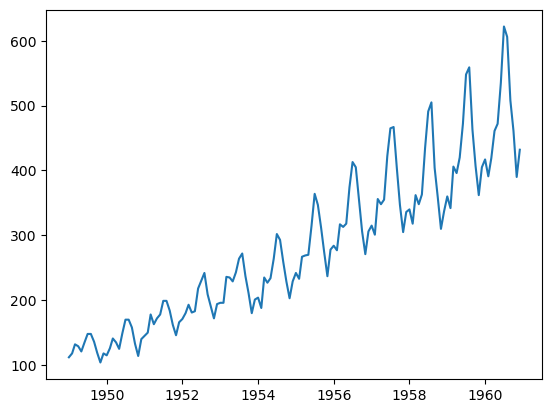

In [29]:
plt.plot(ts)

#### Visualização por ano

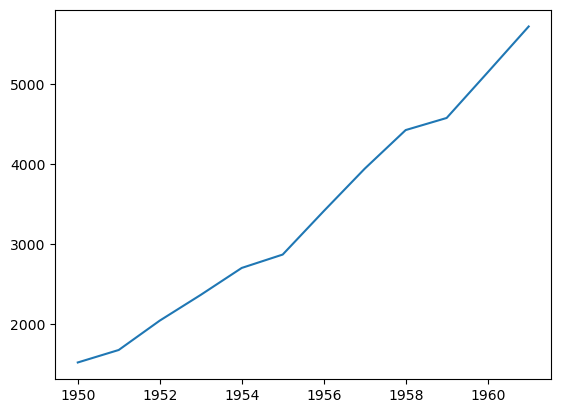

In [30]:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

#### Visualização por mês

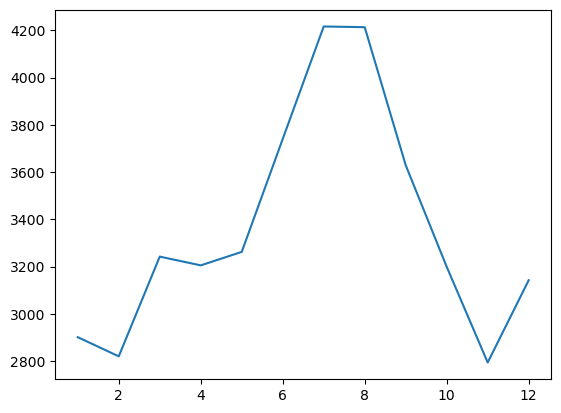

In [31]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

#### Visualização de datas específicas 

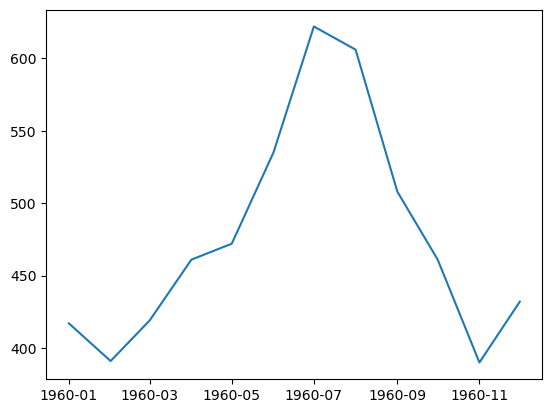

In [32]:
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)